# Analysis


## Table of Contents
1. [Quick Data Look](#quick)
2. [Finding Notes](#find_notes)
3. [Data Generator](#data_gen)

---

<a name="quick"></a>
## Quick Data Look

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from scipy.io import wavfile

import warnings
warnings.filterwarnings('ignore')

### Load custom classes

In [2]:
%run classes/music.py
%run classes/music_gen.py

### Load sound

In [3]:
# I'm ignoring sampling rate for the moment (the first arg here)
_, c2    = wavfile.read('sounds/wav/cello_pluck/single/c2.wav')
_, a3    = wavfile.read('sounds/wav/cello_pluck/single/a3.wav')
_, a3_d3 = wavfile.read('sounds/wav/cello_pluck/multi/a3_d3.wav')
_, whis  = wavfile.read('sounds/wav/whistle.wav')

# spliting the wavefile into two channels
c2_chan1,    c2_chan2    = zip(*c2)
a3_chan1,    a3_chan2    = zip(*a3)
a3_d3_chan1, a3_d3_chan2 = zip(*a3_d3)
whis_chan1,  whis_chan2  = zip(*whis)

# Quick plot of the different notes

Two somewhat surprising things:
- The cello sound is more distorted than I would expect
- A human whistle has really high frequency

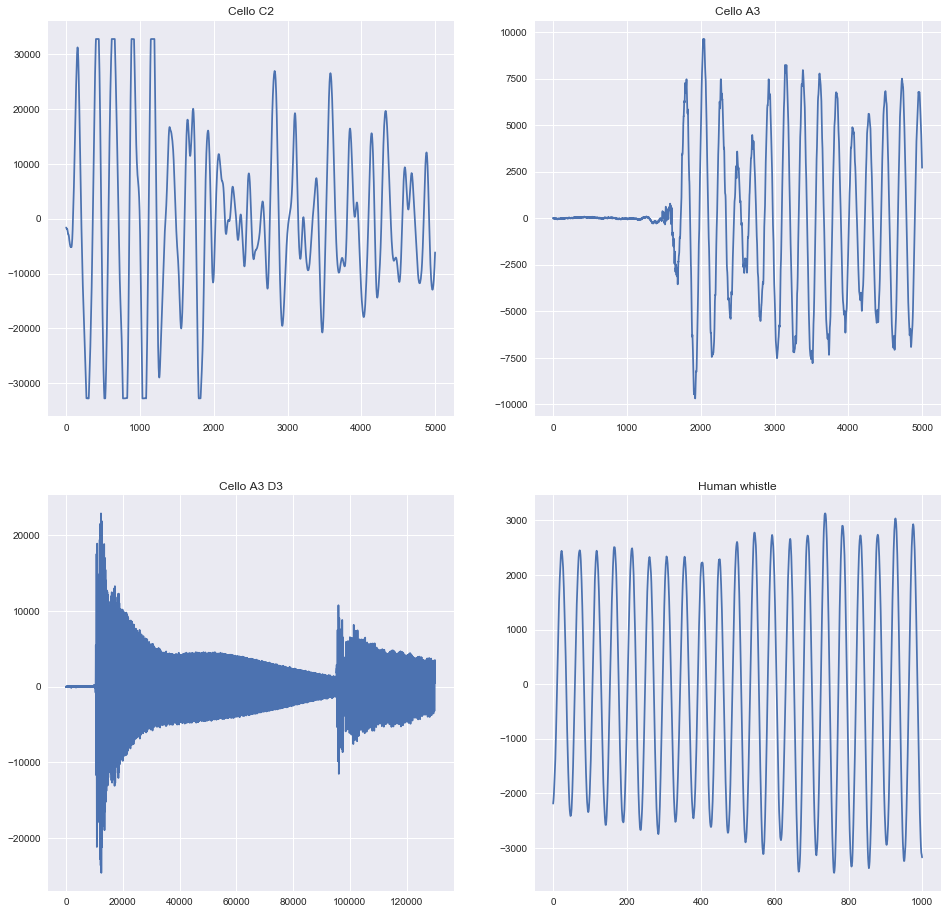

In [4]:
# creating the subplots
fig, axarr = plt.subplots(2, 2, figsize=(16, 16))

# The numbers here needed some tinkering to plot at the right point
axarr[0][0].plot(c2_chan1[70000:75000], "-")
axarr[0][1].plot(a3_chan1[80000:85000], "-")
axarr[1][0].plot(a3_d3_chan1[70000:200000], "-")
axarr[1][1].plot(whis_chan1[70000:71000], "-")

# labeling each plot with it's note
axarr[0][0].set(title="Cello C2")
axarr[0][1].set(title="Cello A3")
axarr[1][0].set(title="Cello A3 D3")
_ = axarr[1][1].set(title="Human whistle")

<a name="find_notes"></a>
## Finding notes

### Load the music and compile

In [11]:
music = Music()
music.read('sounds/wav/cello_pluck/single/a3.wav')
notes = music.compile_music()
notes

,time,id,signal,pitch,given_pitch,loudness,note,octave,alter,duration,typ
0,0.0,45,7115093.96,208.0,207.65,9625,G,3,1,0.25,sixteenth


### Plot the predicted frequency against the actual frequency

My cello appears to be out of tune.  This algorithm pushes the frequency to the closest frequency availiable on the [Western Scale][1].

[1]: https://en.wikipedia.org/wiki/Scale_(music)

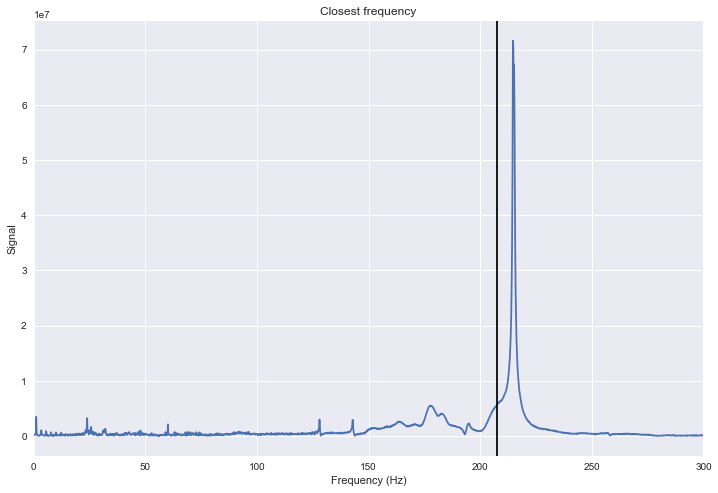

In [12]:
fft_data = np.abs(fft(music.chan1))
conversion_factor = music.sample_rate / len(fft_data)
x = [i * conversion_factor for i in range(len(fft_data))]

plt.figure(figsize=(12, 8))
plt.plot(x, fft_data)
plt.xlim(0, 300)
plt.title("Closest frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Signal")
_ = plt.axvline(notes.iloc[0].given_pitch, color="k")

<a name="data_gen"></a>
## Data generator

### Load music

In [7]:
music = Music()
music.read('sounds/wav/cello_pluck/expert/bach.wav')

### Gets A segment of the music where an instrument is playing

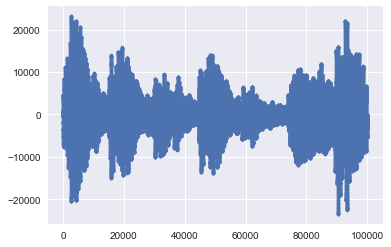

In [8]:
seg = music.chan1[300000:400000]
_ = plt.plot(seg, ".")

### Shows the first 7 generated octaves

Stretch and compress music to different frequencies

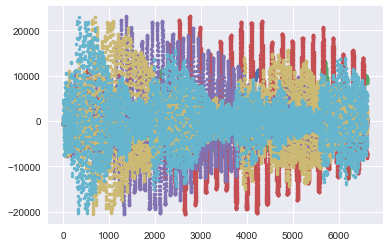

In [9]:
segs = Music_Gen(seg).ret()

for s in segs[:84:12]:
    plt.plot(s, ".")

### Shows the first 10 generated notes

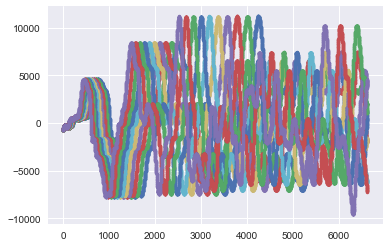

In [10]:
for s in segs[:10]:
    plt.plot(s, ".")